C:\Users\Tudo\AppData\Local\Temp\ipykernel_18908\121203569.py:71: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  plt.tight_layout()
C:\Users\Tudo\AppData\Local\Temp\ipykernel_18908\121203569.py:71: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  plt.tight_layout()
C:\Users\Tudo\AppData\Local\Temp\ipykernel_18908\121203569.py:71: UserWarning: Glyph 31186 (\N{CJK UNIFIED IDEOGRAPH-79D2}) missing from current font.
  plt.tight_layout()
C:\Users\Tudo\AppData\Local\Temp\ipykernel_18908\121203569.py:71: UserWarning: Glyph 38651 (\N{CJK UNIFIED IDEOGRAPH-96FB}) missing from current font.
  plt.tight_layout()
C:\Users\Tudo\AppData\Local\Temp\ipykernel_18908\121203569.py:71: UserWarning: Glyph 22739 (\N{CJK UNIFIED IDEOGRAPH-58D3}) missing from current font.
  plt.tight_layout()
C:\Users\Tudo\AppData\Local\Temp\ipykernel_18908\121203569.py:71: UserWarning: Glyph 20239 (\N{CJK UNIFIED IDEOGRAPH-4F0F}) missing from cur

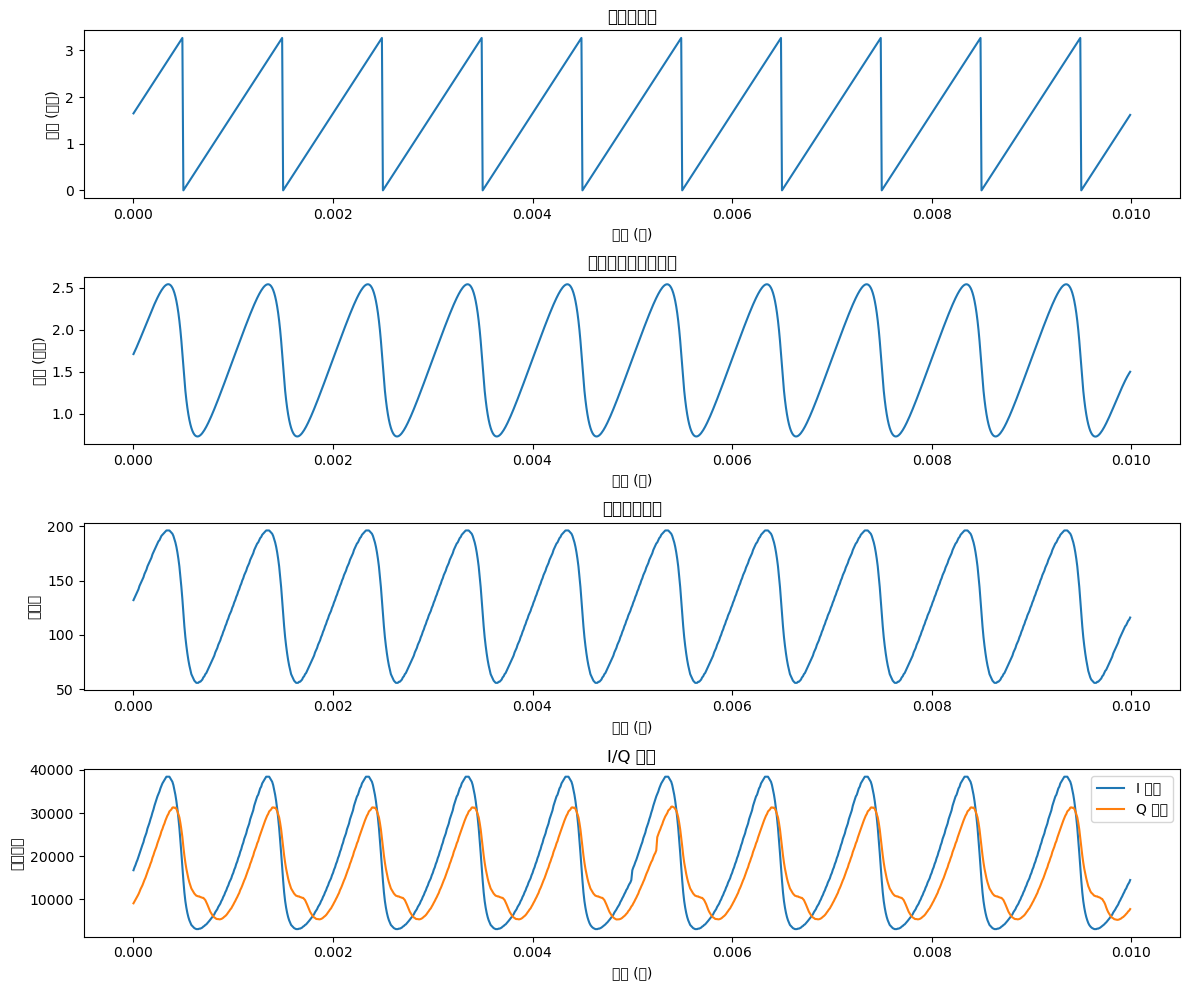

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# 設置中文字體
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 參數設定
fs = 100000  # 取樣頻率
t = np.arange(0, 0.01, 1/fs)  # 時間向量，0.01秒
f_vco = 1000  # VCO頻率，1000Hz
v_max = 3.3  # 最大電壓
v_min = 0.0  # 最小電壓
levels = 256  # 量化層次
delay_samples = 500  # 接收信號延遲的樣本數（對應目標距離）

# 產生鋸齒波
sawtooth_wave = (v_max - v_min) * (t * f_vco - np.floor(0.5 + t * f_vco)) + (v_max + v_min) / 2

# 設計低通濾波器
nyquist = 0.5 * fs
cutoff = 2000  # 設定截止頻率為2000Hz
normal_cutoff = cutoff / nyquist
b, a = butter(1, normal_cutoff, btype='low', analog=False)
sawtooth_wave_lpf = filtfilt(b, a, sawtooth_wave)

# 量化
quantized_wave = np.round((sawtooth_wave_lpf - v_min) / (v_max - v_min) * (levels - 1)).astype(int)

# 模擬接收信號（延遲版本的發射信號）
received_wave = np.roll(quantized_wave, delay_samples)

# 混頻（簡單的乘法混頻）
i_signal = quantized_wave * received_wave
q_signal = quantized_wave * np.roll(received_wave, int(fs / (4 * f_vco)))  # 延遲90度的接收信號

# 繪圖
plt.figure(figsize=(12, 10))

# 原始鋸齒波
plt.subplot(4, 1, 1)
plt.plot(t, sawtooth_wave)
plt.title('原始鋸齒波')
plt.xlabel('時間 (秒)')
plt.ylabel('電壓 (伏特)')

# 低通濾波後的鋸齒波
plt.subplot(4, 1, 2)
plt.plot(t, sawtooth_wave_lpf)
plt.title('低通濾波後的鋸齒波')
plt.xlabel('時間 (秒)')
plt.ylabel('電壓 (伏特)')

# 量化後的波形
plt.subplot(4, 1, 3)
plt.plot(t, quantized_wave)
plt.title('量化後的波形')
plt.xlabel('時間 (秒)')
plt.ylabel('量化值')

# I/Q 信號
plt.subplot(4, 1, 4)
plt.plot(t, i_signal, label='I 信號')
plt.plot(t, q_signal, label='Q 信號')
plt.title('I/Q 信號')
plt.xlabel('時間 (秒)')
plt.ylabel('信號強度')
plt.legend()

plt.tight_layout()
plt.show()
